In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

print("done")

done


In [2]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

categories = [
        # "ctscinet", # no defined genre
        "career_related_policy",
        "working_life",
        "career_profiles",
        # "life_and_career_balance",# no defined genre
        # "myscinet", # no defined genre
        # "issues_and_perspectives", # too much overlap with advice, no defined genre
        "advice"
        ]

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", genre="advice")
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

print("done")

done


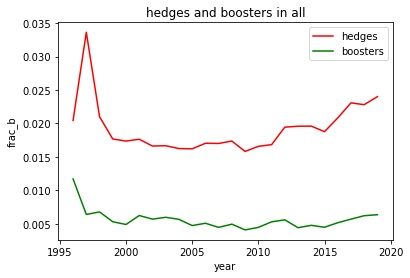

In [4]:
counts_df_h = clh.hedges(full_df, hedges="hedges")
counts_df_b = clh.hedges(full_df, hedges="boosters")

# print(counts_df_h.head(2))

counts_df_h["frac_h"] = counts_df_h["hedges"]/counts_df_h["wc"]
counts_df_b["frac_b"] = counts_df_b["boosters"]/counts_df_b["wc"]

counts_plot_df_h = counts_df_h.groupby("year").mean()
counts_plot_df_b = counts_df_b.groupby("year").mean()

counts_plot_df_h = counts_plot_df_h.reset_index()
counts_plot_df_b = counts_plot_df_b.reset_index()
# counts_df.head()

sns.lineplot(x="year", y="frac_h", color="red", label="hedges", data=counts_plot_df_h)
sns.lineplot(x="year", y="frac_b", color="green", label="boosters", data=counts_plot_df_b)

plt.title("hedges and boosters in all")
plt.savefig("../figs/hedges_all.png")

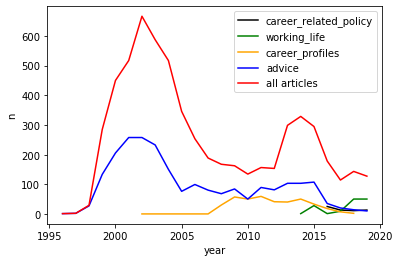

In [5]:
full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

colors = ["black","green","orange","blue","purple","yellow"]
dfs = []
count=0

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    dfs.append(cat_df)
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    # print(cat_vis.head())
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat, data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

1
2
3
4


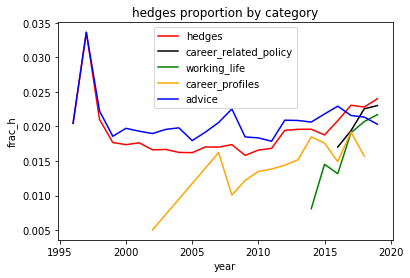

In [7]:
sns.lineplot(x="year", y="frac_h", color="red", label="hedges", data=counts_plot_df_h)

count=0

for df in dfs:
    counts_df = clh.hedges(df, hedges="hedges")

    counts_df["frac_h"] = counts_df["hedges"]/counts_df["wc"]

    counts_plot_df = counts_df.groupby("year").mean()

    counts_plot_df = counts_plot_df.reset_index()

    sns.lineplot(x = "year", y = "frac_h", color = colors[count], label=categories[count], data=counts_plot_df)
    count+=1
    # print(count)

plt.title("hedges proportion by category")
plt.savefig("hedges_by_category.png")

In [ ]:
sns.lineplot(x="year", y="frac_b", color="red", label="hedges", data=counts_plot_df_h)

count=0

for df in dfs:
    counts_df = clh.hedges(df, hedges="boosters")

    counts_df["frac_b"] = counts_df["boosters"]/counts_df["wc"]

    counts_plot_df = counts_df.groupby("year").mean()

    counts_plot_df = counts_plot_df.reset_index()

    sns.lineplot(x = "year", y = "frac_b", color = colors[count], label=categories[count], data=counts_plot_df)
    count+=1
    # print(count)

plt.title("boosters proportion by category")
plt.savefig("boosters_by_category.png")